In [1]:
import pandas as pd
FILE='./swine_h1n1.csv'
cols=['id','geometric_mean_risk']
seqf=pd.read_csv(FILE)[cols].dropna()#.head(15)
seqf['geometric_mean_risk']=1/seqf.geometric_mean_risk

FILE='./swine_h3n2.csv'
cols=['id','geometric_mean_risk']
seqf2=pd.read_csv(FILE)[cols].dropna()#.head(15)
seqf2['geometric_mean_risk']=1/seqf2.geometric_mean_risk



seqf=pd.concat([seqf,seqf2])

In [2]:
def getInfo(term="A/swine/Minnesota/A02711856/2022",variables=None,lookup=False):
    if not lookup:
        return term.split('/')[2]
    from Bio import Entrez
    Entrez.email = "ishanu@uchicago.edu"    
    handle = Entrez.esearch(db="nucleotide", term=term)
    record = Entrez.read(handle)
    Ldict={}
    for ID in record["IdList"]:
        handle = Entrez.efetch(db="nucleotide", id="2289156410", rettype="gb", retmode="json")
        XML=handle.read()
        LINES=[x.strip() for x in XML.split('\n')]
        LINES=[x[1:]+x[0].replace('/','') for x in LINES if '/' in x[:1] and '=' in x]
        Ldict[ID]={x.split('=')[0]:x.split('=')[1] for x in LINES }
    df=pd.DataFrame(Ldict).transpose().drop_duplicates().transpose()   
    if df.empty:
        return term.split('/')[2]
    return df.loc['country'].values[0]    

In [3]:
def getCountry(row):
    #print(row.id)
    return getInfo(row.id)
seqf['country']=seqf.apply(getCountry, axis=1)
seqf.to_csv('seqf.csv')

In [ ]:
# warning! .. running this too many times costs money
! ./geocode.py -i seqf.csv -o seqfgeo -A country

{'formatted_address': 'London, UK', 'latitude': 51.5072178, 'longitude': -0.1275862, 'accuracy': 'APPROXIMATE', 'google_place_id': 'ChIJdd4hrwug2EcRmSrV3Vo6llI', 'type': 'locality,political', 'postcode': '', 'input_string': 'London, England', 'number_of_results': 1, 'status': 'OK'}
Geocoded: Denmark: OK
Geocoded: North_Carolina: OK
Geocoded: Minnesota: OK
Geocoded: Kansas: OK
Geocoded: Oklahoma: OK
Geocoded: North_Carolina: OK
Geocoded: Minnesota: OK
Geocoded: Minnesota: OK
Geocoded: Texas: OK
Geocoded: Italy: OK
Geocoded: Italy: OK
Geocoded: Missouri: OK
Geocoded: Missouri: OK
Geocoded: Missouri: OK
Geocoded: Indiana: OK
Geocoded: Illinois: OK
Geocoded: South_Dakota: OK
Geocoded: Missouri: OK
Geocoded: Illinois: OK
Geocoded: Iowa: OK
Geocoded: North_Carolina: OK
Geocoded: Iowa: OK
Geocoded: Iowa: OK
Geocoded: Missouri: OK
Geocoded: North_Carolina: OK
Geocoded: Iowa: OK
Geocoded: North_Carolina: OK
Geocoded: Iowa: OK
Geocoded: Iowa: OK
Geocoded: Minnesota: OK
Geocoded: Indiana: OK
Geoc

In [4]:
gf=pd.read_csv('seqfgeo',index_col=0)
gf.index=seqf.id
gf=gf.reset_index().merge(seqf)
gf

,id,formatted_address,latitude,longitude,accuracy,google_place_id,type,postcode,input_string,number_of_results,status,geometric_mean_risk,country
0,A/swine/Denmark/S24856-3/2021,Denmark,56.263920,9.501785,APPROXIMATE,ChIJ-1-U7rYnS0YRzZLgw9BDh1I,"country,political",NaN,Denmark,1,OK,32.946868,Denmark
1,A/swine/North_Carolina/A02750760/2022,"North Carolina, USA",35.759573,-79.019300,APPROXIMATE,ChIJgRo4_MQfVIgRGa4i6fUwP60,"administrative_area_level_1,political",NaN,North_Carolina,1,OK,41.542757,North_Carolina
2,A/swine/Minnesota/A02711848/2022,"Minnesota, USA",46.729553,-94.685900,APPROXIMATE,ChIJmwt4YJpbWE0RD6L-EJvJogI,"administrative_area_level_1,political",NaN,Minnesota,1,OK,44.395065,Minnesota
3,A/swine/Kansas/A02711847/2022,"Kansas, USA",39.011902,-98.484246,APPROXIMATE,ChIJawF8cXEXo4cRXwk-S6m0wmg,"administrative_area_level_1,political",NaN,Kansas,1,OK,71.072914,Kansas
4,A/swine/Oklahoma/A02711857/2022,"Oklahoma, USA",35.007752,-97.092877,APPROXIMATE,ChIJnU-ssRE5rIcRSOoKQDPPHF0,"administrative_area_level_1,political",NaN,Oklahoma,1,OK,47.139588,Oklahoma
...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,A/swine/Iowa/A02636674/2022,"Iowa, USA",41.878003,-93.097702,APPROXIMATE,ChIJGWD48W9e7ocR2VnHV0pj78Y,"administrative_area_level_1,political",NaN,Iowa,1,OK,62.401803,Iowa
279,A/swine/North_Carolina/A02636673/2022,"North Carolina, USA",35.759573,-79.019300,APPROXIMATE,ChIJgRo4_MQfVIgRGa4i6fUwP60,"administrative_area_level_1,political",NaN,North_Carolina,1,OK,51.789272,North_Carolina
280,A/swine/North_Carolina/A02711812/2022,"North Carolina, USA",35.759573,-79.019300,APPROXIMATE,ChIJgRo4_MQfVIgRGa4i6fUwP60,"administrative_area_level_1,political",NaN,North_Carolina,1,OK,50.968733,North_Carolina
281,A/swine/Nebraska/A02246971/2021,"Nebraska, USA",41.492537,-99.901813,APPROXIMATE,ChIJ7fwMtciNk4cRxArzDwyQJ6E,"administrative_area_level_1,political",NaN,Nebraska,1,OK,60.890020,Nebraska


In [5]:
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import contextily as ctx
import geopandas
import geoplot as gplt
import pylab as plt
import pandas as pd
import matplotlib.cm as cm
import matplotlib as mpl
import numpy as np
import json


In [6]:
geo_DF=geopandas.GeoDataFrame(
    gf, crs="EPSG:4326",geometry=geopandas.points_from_xy(gf.longitude, gf.latitude))
df=geo_DF.to_crs('epsg:4326')
df_=df.to_crs('epsg:4326')
df__ = df.to_crs(epsg=3857) # reproject it in Web mercator
geo_DF__ = geo_DF.to_crs(epsg=3857) # reproject it in Web mercator

In [158]:
def getColor(x,cmap='jet',VMIN=.5,VMAX=1.0,alpha=None):
    if alpha is None:
        alpha=1
    else:
        alpha = (((x-VMIN)/(VMAX-VMIN)))
    if alpha == 1:
        alpha=.999
    norm = mpl.colors.Normalize(vmin=VMIN, vmax=VMAX)
    m = cm.ScalarMappable(norm=norm, cmap=cmap)
    ctup=np.array(list(m.to_rgba(x)))
    ctup[3]=alpha
    return tuple(ctup)

def getColor(x,cmap='jet',VMIN=.5,VMAX=1.0):
    norm = mpl.colors.Normalize(vmin=VMIN, vmax=VMAX)
    m = cm.ScalarMappable(norm=norm, cmap=cmap)
    return m.to_rgba(x)

def plotRisk(df,ax,variable='geometric_mean_risk',ALPHA=.2,COL=None,
             cmap='jet',VMIN=0,VMAX=None,markersize=20,markeredgecolor=None):
    df=df.sort_values(variable,ascending=True)
    if VMAX is None:
        VMAX=1
    MS = lambda x: markersize*((x*1 - .5)**4.0) #/ ((.9 - .5)**1.8)    
    df.plot(
        ax=ax,
        markersize=markersize* MS(df[variable]),
        edgecolor=markeredgecolor,
        color=getColor(
            df[variable],
            cmap=cmap,
            VMIN=VMIN,
            VMAX=VMAX
        ),
        alpha=ALPHA
    )
    fraction=.025
    norm = mpl.colors.Normalize(vmin=VMIN, vmax=VMAX)
    cax = ax.inset_axes([.4, 0.1, 0.3, 0.02])
    cbar = ax.figure.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap.replace('_r','')),orientation='horizontal',
            ax=ax, cax=cax,pad=.0, fraction=fraction)
    cbar.ax.set_title('risk',fontsize=20)
    #cbar.ax.set_xlabel('useless',fontsize=12)
    cbar.ax.tick_params(labelsize=20)
    return ax    

def saveFIG(filename='tmp.pdf'):
    import pylab as plt
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.savefig(filename,dpi=300, bbox_inches = 'tight',pad_inches = 0,transparent=True) 
    return

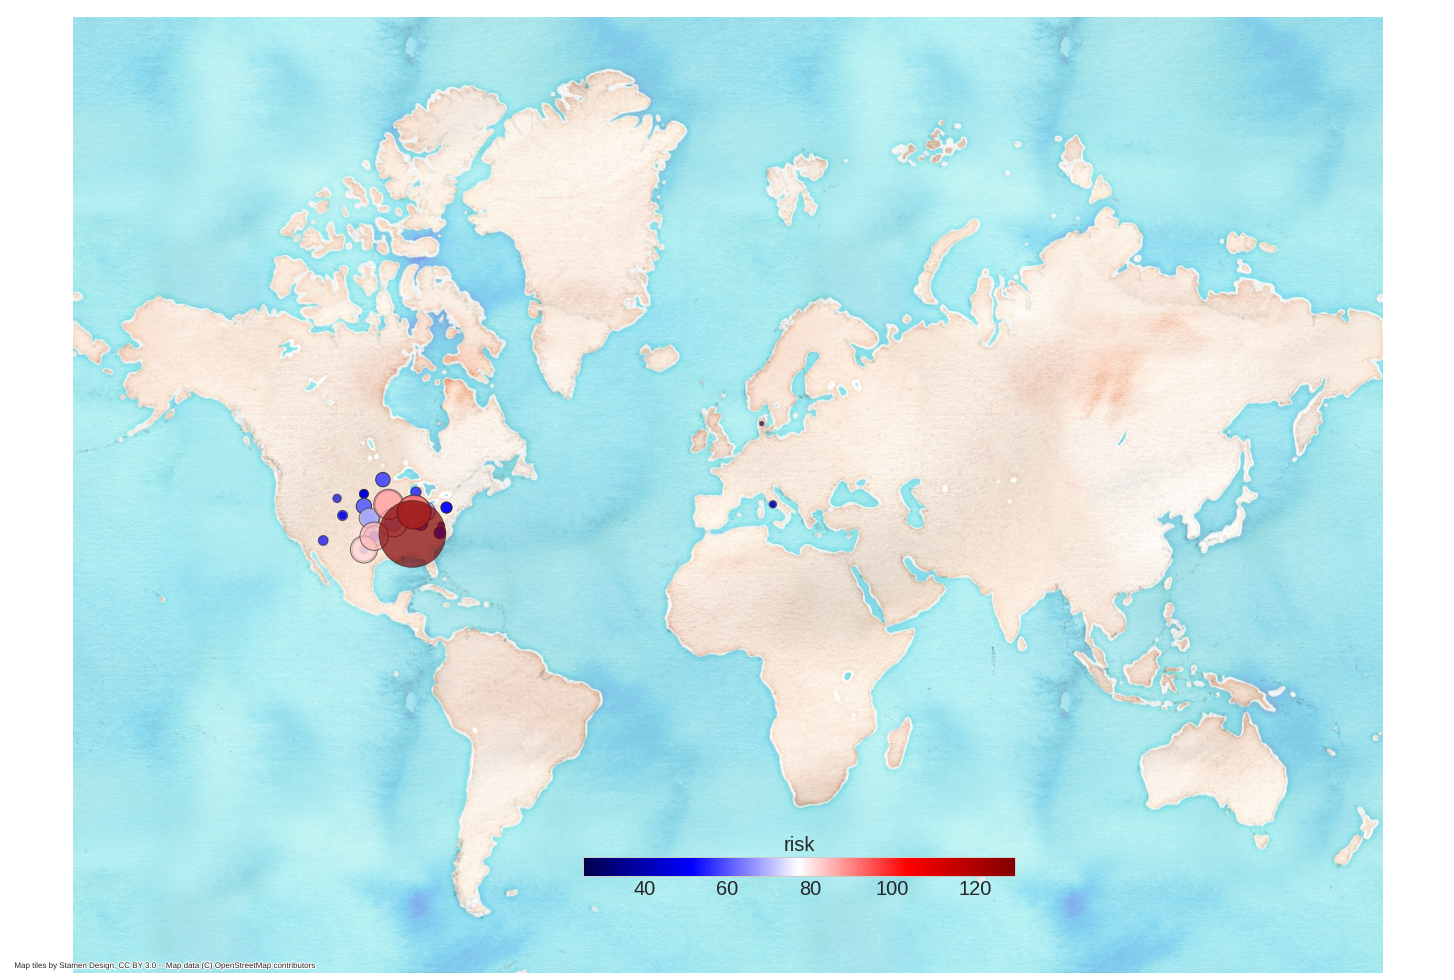

In [159]:
fname1='./WB_Coastlines_10m/WB_Coastlines_10m.shp'
df1 = geopandas.read_file(fname1)
plt.style.use('dark_background')
plt.style.use('seaborn-whitegrid')
df1__ = df1.to_crs(epsg=3857) # reproject it in Web mercator
ax1 = df1__.plot(figsize=(20,20), alpha=.05, edgecolor='k')
variable='geometric_mean_risk'
cmap='seismic'
VMIN=geo_DF__.geometric_mean_risk.min()
VMAX=geo_DF__.geometric_mean_risk.max()
ALPHA=.7
plotRisk(geo_DF__,ax=ax1,cmap=cmap,markersize=0.004,ALPHA=ALPHA,
         markeredgecolor='.2',VMIN=geo_DF__.geometric_mean_risk.min(),
         VMAX=geo_DF__.geometric_mean_risk.max())
#ctx.add_basemap(ax1,source=ctx.providers.Stamen.TonerLite,alpha=.5)
#ctx.add_basemap(ax1,source=ctx.providers.Stamen.Toner)
ctx.add_basemap(ax1,source=ctx.providers.Stamen.Watercolor,alpha=.5)
#ctx.add_basemap(ax1,source=ctx.providers.NASAGIBS.ViirsEarthAtNight2012,alpha=1)
ax1.set_ylim(-.92e7,None)
ax1.set_axis_off()
#saveFIG(filename='bionorad_black.png')
saveFIG(filename='bionorad_wcol.png')
